# Affective Computing - Programming Assignment 2

### Objective

Your task is to extract a set of prosodic correlates (i.e. suprasegmental speech parameters) and cepstral features from speech recordings. Then, an emotion recognition system is constructed to recognize happy versus sad emotional speech (a quite easy two class problem) using a simple supervised classifier training and testing structure.

The original speech data is a set of simulated emotional speech (i.e. acted) from ten speakers speaking five different pre-segmented sentences of roughly 2-3 seconds in two different emotional states (happy and sad) totaling 100 samples.
Basic prosodic features (i.e. distribution parameters derived from the prosodic correlates) are extracted using a simple voiced/unvoiced analysis of speech, pitch tracker, and energy analysis. Another set of Mel-Frequency Cepstral Coefficients (MFCC) features are also calculated for comparison. 

To produce speaker independent and content dependent emotion recognition case (i.e. while a same persons samples are not included in both training and testing sets, the same sentences are spoken in both the training and the testing sets) that could correspond to a public user interface with specific commands.

Support Vector Machine (SVM) classifiers are trained. A random subset of 1/2 of the available speech data (i.e. half of the persons) is used to train the emotion recognition system, first using a set of simple prosodic parameter features and then a classical set of MFCC derived features. The rest of the data (the other half of the persons) is then used to evaluate the performances of the trained recognition systems.

<!--### Implementation
<!---The data and toolbox files used in this exercise are:
Study the toolbox functions (e.g. ‘getF0’, ‘melcepst’) and the generic MATLAB functions (e.g. ‘hamming’, ‘conv’, ‘resample’, ‘filter’, ‘mean’, ‘std’, ‘prctile’, ‘kurtosis’, ‘sum’, ‘length’, ‘linspace’, ‘trainsvm’, ‘svmclassify’, and ‘confusionmat’) as they are needed in the exercise.-->

<!--Nine dictionaries are stored in the provided data file:-->

<!--* speech_sample
* testing_class 
* testing_data_mfcc 
* testing_data_proso 
* testing_personID 
* training_class 
* training_data_mfcc 
* training_data_proso 
* training_personID -->

<!--To access one dictionary, using [`scipy.io`](https://docs.scipy.org/doc/scipy/reference/io.html) library for example: scipy.io.loadmat('filePath')['dictoionaryName']. **speech_sample** is used in the feature extraction part and the pre-extracted features in the emotion recognition part of this lab are **testing_class**, **testing_data_mfcc**, **testing_personID**, **training_class**, **training_data_mfcc**, **training_data_proso**, **training_personID**.-->


## Task 0. Preparation
Downsample the ‘speech_sample’ from the original Fs of 48 kHz to 11.025 kHz using [`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html) function.

**Steps**:
1. Load data 'speech_sample' from file *lab2_data.mat*. It is better to make sure the sample is a 1-D time series.
2. Declare the sampling frequency of the original signal, and your new sampling frequency.
3. Resample the signal using [`scipy.signal.resample()`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.resample.html)
4. Visualize the resampled signal. Please make a appropriate time vector as the x axis.

<!--### Task 0.1. Load Data
Load the ‘speech_sample’ from the provided dataset containing a raw speech waveform and do the following (Note, the sampling rate (fs) of the sample speech signal is 48 kHz):-->

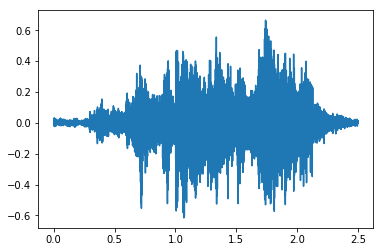

In [2]:
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt

# 1. Load the 'speech_sample'
exerciseData = sio.loadmat('lab2_data.mat')
speechSample = exerciseData['speech_sample'].reshape(-1)

# print speechSample
# 2. Declare the source sampling frequency, and the target sampling frequency.
#    2.1 Source sampling frequency
fs_source = 48000.0

#    2.2 Target sampling frequency
# Target frequency
fs_down = 11025.0

# 3. Downsample the speech sample
speech_resampled = signal.resample(speechSample, np.round(len(speechSample) * fs_down / fs_source).astype('int'))

# print speech_resampled
# 4. Visualize the downsampled speech signal.
#    4.1 Creating the corresponding time vector, whose length is same to the length to the given signal. 
#        You can use np.linspace() function to perform this. For example

# print len(speechSample)

timeVector = np.linspace(0,2.5,len(speech_resampled))
# print timeVector

#    4.2 Plot your result
plt.plot(timeVector,speech_resampled)

## Task 1. Feature Extraction

### Task 1.1 MFCC calculations using the provided sample speech signal.

**Steps**:
1. Pre-emphasize the resampled signal by applying a high pass filter, using the [`scipy.signal.lfilter()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) function.
   Apply a pre-emphasis filter $$ H(z) = 1-a \times z^{-1} $$ with α=0.98 to emphasize higher frequencies in your downsampled speech signal (Tip: use [`scipy.signal.lfilter`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.lfilter.html)). 
   
   Hint for defining the filter: you will provide two vectors **b** and **a** to define the filter, **a** for the denominator and **b** for the numerator. So finally your filter will be defined as $$H(z) = \frac{b[0] z^0 + b[1] z^{-1} + ... + b[i] z^{-i}+...}{a[0] z^0 + a[1] z^{-1} + ... + a[i] z^{-i}+...}$$
2. Extract the 12 mfcc coefficient by using the [`python_speech_features.mfcc()`](http://python-speech-features.readthedocs.io/en/latest/) function.
    1. **The [`python_speech_features.mfcc()`](http://python-speech-features.readthedocs.io/en/latest/) function has its internal pre-emphasis functionality. However, we do the pre-emphasis beforehand in order to have a better understanding on it.**
3. Visualize the 12 mfcc coefficient contours. Please also make the corresponding time vector as the x axis.
4. Calculate the mean of each contour using [`numpy.mean(axis=)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

[ -2.16803659  -7.55293839 -11.45023659  -9.15052974  -4.9467118
 -18.90732587  -9.39367434  -0.93334243   1.59932744  -7.89636553
 -13.94829969  -0.62393599]


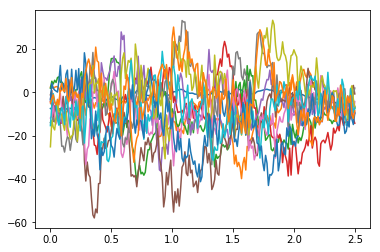

In [3]:
from scipy.signal import lfilter
from python_speech_features import mfcc
# 1. Pre-emphasize your resampled signal.
#    1.1 Define the polynomial of your fitler
#        filter coefficients b, which is the numerator
#        filter coefficients a, which is the denominator

# number = len(speechSample)

a = [1]

b = [1, -0.98]


# print b

#    1.2 Apply the filter on the signal
preEmphasizedSample = lfilter(b, a, speech_resampled)

# 2. Extract the mfcc coefficient by callying the mfcc() function
     # remeber to set the pre-emphasize argument to 0 since the signal has been pre-emphasized.
frameLen = int(2 ** np.floor(np.log2(0.03*fs_down)))
mfccContour = mfcc(preEmphasizedSample, \
                   fs_down, \
                   winlen = float(frameLen)/fs_down, \
                   winstep = float(frameLen)/(2*fs_down), \
                   numcep = 12, \
                   preemph = 0)

# 3. Plot the 12 mfcc contours
#    3.1 Create the time vector for the MFCC contour. 
#        Again, using the np.linspace() function.
#        However, please note the length of the resulted mfcc contour is different to the sample length.
#        Thus, the length of your time vector here should be the length of the mfcc contour
#        The ending point can be computed by the: a) number of mfcc samples, and b) time length of samples used
#        for calculating one mfcc sample.
#        
#        For example, here we set the frame increment length is 128 samples, corresponding roughly to 11.6ms frames 
#        at Fs=11025Hz. So for inputs of the np.linspace() function, the ending point is mfccNum * 11.6ms around.

mfccNum = len(mfccContour)

# print frameLen
# print mfccNum
time = frameLen/fs_down *1000
# print time
tVector = np.linspace(0,2.5,mfccNum)

#    3.2 Visualize your MFCC contour
plt.plot(tVector,mfccContour)


# 4. Calculate the mean for each contour.


print np.mean(mfccContour, axis=0)


### Question 1. Why do we need to pre-emphasize the speech signal before computing the MFCC feature?

### Your answer:








The goal of pre-emphasis is to compensate the high-frequency part that was suppressed during the sound production mechanism of humans. Moreover, it can also amplify the importance of high-frequency formants.

### Task 1.2 Extract the Intensity/Energy parameter
Firstly, please calculate the short time energy (STE) of the downsampled ‘speech_sample’ using the squared signal $x(t)^2$ and a 0.01s hamming window frames (Note! the extra length of the window. Clip half a window length from the beginning and at the end). Then calculate 5 distribution parameter features from the utterance (the signal).


**Steps**:
1. Define a hamming window using the [`scipy.signal.hamming()`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.hamming.html) function. The window length is the number of frames in 0.01s.

2. Apply the hamming window to convolve the squared signal, using the [`scipy.signal.convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) function. The convolution result is the short time energy (STE) controu.
3. Clip half window of frames from the begining and ending of STE contour.
4. Visualize the resulted STE controur. Please also include the time axis
5. Calculating the following 5 distribution parameter feature from the STE contour:
    1. Mean, using the [`numpy.mean(https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)`]() function.
    2. Standard Deviation (SD), using the [`numpy.std()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.std.html) function.
    3. 10% percentile, using the [`numpy.percentile()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html) function.
    4. 90% percentile, using the [`numpy.percentile()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html) function.
    5. Kurtosis, using the [`scipy.stats.kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) function.


[0.7478650778846414, 0.9053065294782028, 0.007381558338121589, 2.0824150050645764, 1.9362779208215812]


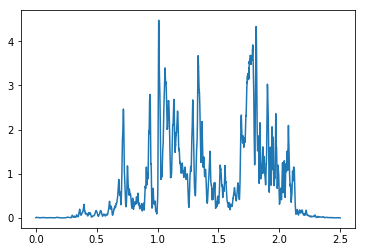

In [12]:
from scipy.stats import kurtosis
# 1. Define a hamming window
#    1.1 Calculate the window length, which the number of frames within 0.01s
hammingLength = int(fs_down*0.01)

#    1.2 Define the hamming window using signal.hamming()
hammingWindow = signal.hamming(hammingLength)

# print hammingWindow
# print len(hammingWindow)
# 2. Calculate the short time energy (STE) contour by convolve the hamming window and the squared signal, 
#    using the scipy.signal.convolve() function

# arr = np.linspace(1,100,100)
# sig = arr*arr/10000

sig = speech_resampled * speech_resampled
ste = signal.convolve(sig, hammingWindow)

# print len(preEmphasizedSample)
# print hammingWindow
# print sig

# 3. Clip half window of frames from both the beginning and end of the STE contour

# print len(ste)

# start = len(ste)*0.25
# end = len(ste)*0.75
# newste = ste[int(start):int(end)]
newste = ste[hammingLength/2:-hammingLength/2]

# print newste
# 4. Visualize the final STE contour.
#    4.1 Create the time vector for x-axis

xVector = np.linspace(0,2.5,len(newste))

#    4.2 Visualize the STE contour

plt.plot(xVector,newste)

# 5. Calculate the 5 distribution parameter feature the of STE contour
Answer = [np.mean(newste),np.std(newste), np.percentile(newste,10), np.percentile(newste,90),kurtosis(newste)]

print Answer


### Question 2. Why do we need to clip out half a frame from both beginning and ending of the STE 

### Task 1.3. Extract the Pitch/F0 feature
**Steps**:
1. Extract the Pitch/F0 contour of the resampled speech signal using the **getF0()** function in 0.01s frames. The function is provided in the *f0Lib.py* file.
2. Visualize the F0 contour (including the time axis).
3. Extract the 5 distribution parameter features of the extracted F0 countour.



[51.76557834234848, 92.16529162886495, 0.0, 219.59546850800427, -0.32757516607828796]


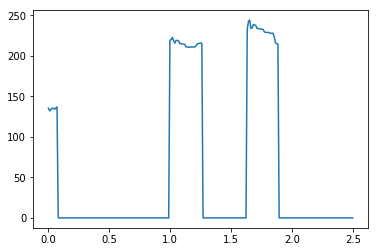

In [5]:
import numpy as np
import scipy.io as sio
from scipy import signal
import scipy
from f0Lib import getF0

# 1. Extract the F0 contour
f0,_,T_ind,_ = getF0(speech_resampled, fs_down)


# 2. Visualize the F0 contour
#    2.1 The time vector can be acquired from the the third returned value of the getF0() function
#        For example T_ind. The time vector can be computed by dividing the the first column of T_ind 
#        with the sampling frequency


#    2.2 Visulize the F0 contour.
x = T_ind[:,0]
xvector = np.linspace(0,2.5,len(x))
plt.plot(xvector,f0)


# 3. Calculate these distribution parameter features
Answer2 = [np.mean(f0),np.std(f0), np.percentile(f0,10), np.percentile(f0,90),kurtosis(f0)]

print Answer2



### Task 1.4. Extract the Rhythm/Durations parameter
**Steps**:
1. Perform a Voiced/Unvoiced speech segmentation of speech signal. Tip: Unvoiced frames are marked with 0 F0 values, you can find the voiced frames (i.e. F0 > 0) using [`numpy.where()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.where.html).
2. From the segmentation, calculate the means and SDs of both Voiced and Unvoiced segment lengths (i.e. voiced segment mean length, SD of voiced segment lengths, unvoiced segment mean length, SD of unvoiced segment lengths).
3. Calculate also the voicing ratio, i.e. the ratio of voiced segments versus total segments (Tip: You can do this simply by using the frames).



In [13]:
# 1. Segmenting the voiced and unvoiced speech segements.
#    1.1 Example on extracting voiced segment lengths
framesInd_voiced = np.where(f0>0)[0]
diff = framesInd_voiced[1:] - framesInd_voiced[0:-1]
voiceToUnviceInd = np.where(diff > 1)[0]
voice_seg_num = len(voiceToUnviceInd) + 1
voice_seg_lengths = np.zeros(voice_seg_num)
tmp = framesInd_voiced[0]

for i in range(voice_seg_num - 1):
    voice_seg_lengths[i] = framesInd_voiced[voiceToUnviceInd[i]] - tmp + 1
    tmp = framesInd_voiced[voiceToUnviceInd[i] + 1]
    
voice_seg_lengths[-1] = framesInd_voiced[-1] - tmp + 1

#####################################################################
###################################################################
#    1.2 Extract unvoiced segment lengths.

framesInd_unvoiced = np.where(f0 <= 0)[0]
diff2 = framesInd_unvoiced[1:] - framesInd_unvoiced[0:-1]
unvoiceToUnviceInd = np.where(diff2 > 1)[0]
unvoice_seg_num = len(unvoiceToUnviceInd) + 1
unvoice_seg_lengths = np.zeros(unvoice_seg_num)
tmp2 = framesInd_unvoiced[0]

for i in range(unvoice_seg_num - 1):
    unvoice_seg_lengths[i] = framesInd_unvoiced[unvoiceToUnviceInd[i]] - tmp2 + 1
    tmp2 = framesInd_unvoiced[unvoiceToUnviceInd[i] + 1]
    
unvoice_seg_lengths[-1] = framesInd_unvoiced[-1] - tmp2 + 1


# 2. Calculate the means and SDs of both Voiced and Unvoiced segment lengths
ans_1 = np.mean(voice_seg_lengths)
ans_2 = np.mean(unvoice_seg_lengths)
ans_3 = np.std(voice_seg_lengths)
ans_4 = np.std(unvoice_seg_lengths)



# 3. Calculate the voicing ratio.


voicing_ratio = float(len(framesInd_voiced))/float(len(framesInd_voiced)+len(framesInd_unvoiced))
answer3 = [ans_1, ans_2, ans_3, ans_4, voicing_ratio]

print answer3

[20.333333333333332, 62.666666666666664, 8.73053390247253, 22.48456260538674, 0.24497991967871485]


### Task 1.5. Check your extracted feature
1. Print your calculated 12 MFCC coefficients.
2. Print the distribution parameter feature of the STE contour.
3. Print the distribution parameter feature of the F0 contour.
4. Print the 5 prodosic features: **mean** and **std** of lengths of **voiced speeches** and **unvoiced speech**, as well as the **voicing ratio**. 


In [14]:
# 1. Print the 12 MFCC coefficients
print np.mean(mfccContour, axis=0)
# 2. Print the distribution paremeter feature of the STE contour
print Answer
# 3. Print the distribution parameter feature of the F0 contour
print Answer2
# 3. Print the 5 prodosic features
print answer3


[ -2.16803659  -7.55293839 -11.45023659  -9.15052974  -4.9467118
 -18.90732587  -9.39367434  -0.93334243   1.59932744  -7.89636553
 -13.94829969  -0.62393599]
[0.7478650778846414, 0.9053065294782028, 0.007381558338121589, 2.0824150050645764, 1.9362779208215812]
[51.76557834234848, 92.16529162886495, 0.0, 219.59546850800427, -0.32757516607828796]
[20.333333333333332, 62.666666666666664, 8.73053390247253, 22.48456260538674, 0.24497991967871485]



## Task 2. Speech Emotion Classification

In this part, you we will the [`sklearn.svm`](http://scikit-learn.org/stable/modules/svm.html) library to perform the speech signal classification. The **‘training_data_proso’** and **‘training_data_mfcc’** matrixes contain the calculated prosodic features for the training set (9 features in each row representing a speech sample) and MFCC derived features (12 features) respectively. The **‘training_class’** group vector contains the class of samples: 1 = happy, 2 = sad; corresponding to the rows of the training data matrices.

In this part, you will get familiar to three kinds of classifiers, namely the SVM classifier, the Random Forest classifier, and the Neural Network classifer (a multi-layer perceptron).

<!---
Test the classifiers and plot confusion matrices.
* Use the ‘svmclassify’ function (and your trained SVM structures) to classify the ‘training_data_*’ and the ‘testing_data_*’ data matrices. Then, calculate average classification performances for both training and testing data. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables ‘training_class’ and ‘testing_class’, respectively.
    * 	Calculate the average classification performances for the training data (‘training_data_proso’ and ‘training_data_mfcc’) using the corresponding prosody and MFCC trained SVMs.
    * 	Calculate the average classification performance for the testing data (‘testing_data_proso’ and testing_data_mfcc’) using the corresponding prosody and MFCC trained SVMs.
* Plot confusion matrices for the training and testing data for both classifiers. Tip, use ‘confusionmat’ function.-->



<!---speech_sample
testing_class
testing_data_mfcc
testing_data_proso
testing_personID
training_class
training_data_mfcc
training_data_proso
training_personID
### Task 2.1. Preparing your data
Dictionaries of the data are listed below:
* speech_sample
* testing_class
* testing_data_mfcc
* testing_data_proso
* testing_personID
* training_class
* training_data_mfcc
* training_data_proso
* training_personID
Use [`scipy.io.loadmat()`] to read the dataset.-->

### Task 2.1. Train and evaluate your SVM classifiers
**Steps**:
1. Load training data.
2. Train a SVM with the prosody data using the **‘training_data_proso’** features and a **3rd order polynomial** kernel.
3. Train a SVM with the MFCC data using the **‘training_data_mfcc’** features and a **3rd order polynomial** kernel.
4. Load testing data
5. Calculate the average classification accuracy for the training data (**‘training_data_proso’** and **‘training_data_mfcc’**) using the corresponding prosody and MFCC trained SVMs.
6. Calculate the average classification accuracy for the testing data (**‘testing_data_proso’** and **‘testing_data_mfcc’**) using the corresponding prosody and MFCC trained SVMs.
7. Print the four accuracies you have calculated.
8. Plot confusion matrices for the training and testing data for both classifiers.

In [8]:
# Initialzing your SVM classifiers.
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 1. Load data
exerciseData = sio.loadmat('lab2_data.mat')

#    1.1 Load 'training_data_proso'
training_data_proso = exerciseData['training_data_proso']

#    1.2 Load 'training_data_mfcc'
training_data_mfcc = exerciseData['training_data_mfcc']


#    1.3 Load 'training_class'
training_class = exerciseData['training_class'].reshape(-1)


# 2. Train your classifier using the prodosic data
#    2.1 Initialize your svm classifer
clf_proso = svm.SVC(degree=3, kernel='poly', cache_size = 5000)

#    2.2 Train you classifier
clf_proso.fit(training_data_proso, training_class) 

# 3. Train your classifer using the mfcc data
#    3.1 Initialize your svm classifer
clf_mfcc = svm.SVC(degree=3, kernel='poly', cache_size = 5000)

#    3.2 Train you classifier
clf_mfcc.fit(training_data_mfcc, training_class) 

# 4. Load testing data
testing_data_mfcc = exerciseData['testing_data_mfcc']
testing_data_proso = exerciseData['testing_data_proso']
testing_class = exerciseData['testing_class'].reshape(-1)

# 5. Calculate the average classification performances for the training data


prediction_proso_train = clf_proso.predict(training_data_proso)
# proso_train_trans = np.transpose(training_data_proso)
# proso_train_trans1 = proso_train_trans[0]
# acc_p_tr = accuracy_score(proso_train_trans1, prediction_proso_train)

prediction_mfcc_train = clf_mfcc.predict(training_data_mfcc)
# mfcc_train_trans = np.transpose(training_data_mfcc)
# mfcc_train_trans1 = mfcc_train_trans[0]
# acc_m_tr = accuracy_score(mfcc_train_trans1, prediction_mfcc_train)
mfcc_T = 0.
proso_T = 0.
for i in range(len(training_data_proso)):
    if prediction_proso_train[i]==training_class[i]:
        proso_T+=1  
    if prediction_mfcc_train[i]==training_class[i]:
        mfcc_T+=1
acc_p_tr = proso_T/len(training_class)
acc_m_tr  = mfcc_T/len(training_class)




# 6. Calculate the average classification performance for the testing data

prediction_proso_test = clf_proso.predict(testing_data_proso)
# proso_train_trans = np.transpose(training_data_proso)
# proso_train_trans1 = label_train_trans[0]
# acc_p_te = accuracy_score(proso_train_trans1, prediction_proso_train)
prediction_mfcc_test = clf_mfcc.predict(testing_data_mfcc)

mfcc_E = 0.
proso_E = 0.
for i in range(len(testing_data_proso)):
    if prediction_proso_test[i]==testing_class[i]:
        proso_E+=1  
    if prediction_mfcc_test[i]==testing_class[i]:
        mfcc_E+=1
acc_p_te = proso_E/len(testing_class)
acc_m_te  = mfcc_E/len(testing_class)


# 7. Print the four accuracies.

print acc_p_tr   # accuracy on the prosodic training data 
print acc_m_tr   # accuracy on the mfcc training data 
print acc_p_te   # accuracy on the prosodic testing data 
print acc_m_te   # accuracy on the mfcc testing data 
 

# 8. Visulize the confusion matrix
from sklearn.metrics import confusion_matrix 

conf_matrix_train_proso = confusion_matrix(training_class, prediction_proso_train)
conf_matrix_train_mfcc = confusion_matrix(training_class, prediction_mfcc_train)
conf_matrix_test_proso = confusion_matrix(testing_class, prediction_proso_test)
conf_matrix_test_mfcc = confusion_matrix(testing_class, prediction_mfcc_test)
print conf_matrix_train_proso,'\n', conf_matrix_train_mfcc,'\n', conf_matrix_test_proso,\
     '\n', conf_matrix_test_mfcc


1.0
0.96
0.84
0.86
[[25  0]
 [ 0 25]] 
[[23  2]
 [ 0 25]] 
[[21  4]
 [ 4 21]] 
[[22  3]
 [ 4 21]]


<!--### Task 2.2. Test your classifiers
Classify the **‘training_data_*’** and the **‘testing_data_*’** data matrices. Then, calculate average classification performances for both training and testing data. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables ‘training_class’ and ‘testing_class’, respectively.
**Steps**:-->


<!--### Task 2.3. Plot confusion matrices for the training and testing data for both classifiers. 
Print following confusion matrix(Tip, use [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function):
* The confusion matrix of the prosody trained SVM using the **‘training_data_proso’**.
* The confusion matrix of the prosody trained SVM using the **‘testing_data_proso’**.
* The confusion matrix of the MFCC trained SVM using the **‘training_data_mfcc’**.
* The confusion matrix of the MFCC trained SVM using the **‘testing_data_mfcc’**.-->

### Task 2.2 Train and evaluate a Random Forest Classifier
Please train one Random Forest classifer for each of the Prosodic and MFCC feature using the [`sklearn.ensemble.RandomForestClassifier()`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and print the classification accuracies and confusion matrices.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 1. Train your classifier using the prodosic data
#    1.1 Initialize your random forest classifer
RFclf_proso = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1)

#    1.2 Train you classifier
RFclf_proso.fit(training_data_proso, training_class) 

# 2. Train your classifer using the mfcc data
#    2.1 Initialize your random forest classifer
RFclf_mfcc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1)

#    2.2 Train you classifier
RFclf_mfcc.fit(training_data_mfcc, training_class) 

# 3. Calculate the average classification performances for the training data

prediction_proso_train = RFclf_proso.predict(training_data_proso)
prediction_mfcc_train = RFclf_mfcc.predict(training_data_mfcc)
mfcc_T = 0.
proso_T = 0.
for i in range(len(training_data_proso)):
    if prediction_proso_train[i]==training_class[i]:
        proso_T+=1  
    if prediction_mfcc_train[i]==training_class[i]:
        mfcc_T+=1
acc_p_tr = proso_T/len(training_class)
acc_m_tr = mfcc_T/len(training_class)


# 4. Calculate the average classification performance for the testing data

prediction_proso_test = RFclf_proso.predict(testing_data_proso)
prediction_mfcc_test = RFclf_mfcc.predict(testing_data_mfcc)
mfcc_E = 0.
proso_E = 0.
for i in range(len(testing_data_proso)):
    if prediction_proso_test[i]==testing_class[i]:
        proso_E+=1  
    if prediction_mfcc_test[i]==testing_class[i]:
        mfcc_E+=1
acc_p_te = proso_E/len(testing_class)
acc_m_te  = mfcc_E/len(testing_class)

print acc_p_tr   # accuracy on the prosodic training data 
print acc_m_tr   # accuracy on the mfcc training data 
print acc_p_te   # accuracy on the prosodic testing data 
print acc_m_te   # accuracy on the mfcc testing data 

# 5. Print the confusion matrix

conf_matrix_train_proso = confusion_matrix(training_class, prediction_proso_train)
conf_matrix_train_mfcc = confusion_matrix(training_class, prediction_mfcc_train)
conf_matrix_test_proso = confusion_matrix(testing_class, prediction_proso_test)
conf_matrix_test_mfcc = confusion_matrix(testing_class, prediction_mfcc_test)

print conf_matrix_train_proso,'\n', conf_matrix_train_mfcc,'\n', conf_matrix_test_proso,\
     '\n', conf_matrix_test_mfcc

1.0
0.98
0.84
0.82
[[25  0]
 [ 0 25]] 
[[24  1]
 [ 0 25]] 
[[20  5]
 [ 3 22]] 
[[21  4]
 [ 5 20]]


### Task 2.3 Train and evaluate a Neural Network Classifier
Please train a multi-layer perceptron for each of the Prosodic and MFCC feature using the [`sklearn.neural_network.MLPClassifier()`](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), and print the classification accuracies and confusion matrices.

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# 1. Train your classifier using the prodosic data
#    1.1 Initialize your mlp classifer
mlpClassifier_proso = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(50, 50, 50), random_state=1, max_iter=20000)

#    1.2 Train you classifier
mlpClassifier_proso.fit(training_data_proso, training_class) 


# 2. Train your classifer using the mfcc data
#    2.1 Initialize your mlp classifer
mlpClassifier_mfcc = MLPClassifier(solver='lbfgs', alpha=1e-4,  hidden_layer_sizes=(50, 50, 50), random_state=1, max_iter=20000)

#    2.2 Train you classifier
mlpClassifier_mfcc.fit(training_data_mfcc, training_class) 


# 3. Calculate the average classification performances for the training data

prediction_proso_train = mlpClassifier_proso.predict(training_data_proso)
prediction_mfcc_train = mlpClassifier_mfcc.predict(training_data_mfcc)
mfcc_T = 0.
proso_T = 0.
for i in range(len(training_data_proso)):
    if prediction_proso_train[i]==training_class[i]:
        proso_T+=1  
    if prediction_mfcc_train[i]==training_class[i]:
        mfcc_T+=1
acc_p_tr = proso_T/len(training_class)
acc_m_tr = mfcc_T/len(training_class)


# 4. Calculate the average classification performance for the testing data

prediction_proso_test = mlpClassifier_proso.predict(testing_data_proso)
prediction_mfcc_test = mlpClassifier_mfcc.predict(testing_data_mfcc)
mfcc_E = 0.
proso_E = 0.
for i in range(len(testing_data_proso)):
    if prediction_proso_test[i]==testing_class[i]:
        proso_E+=1  
    if prediction_mfcc_test[i]==testing_class[i]:
        mfcc_E+=1
acc_p_te = proso_E/len(testing_class)
acc_m_te  = mfcc_E/len(testing_class)

print acc_p_tr   # accuracy on the prosodic training data 
print acc_m_tr   # accuracy on the mfcc training data 
print acc_p_te   # accuracy on the prosodic testing data 
print acc_m_te   # accuracy on the mfcc testing data 


# 5. Print the confusion matrix

conf_matrix_train_proso = confusion_matrix(training_class, prediction_proso_train)
conf_matrix_train_mfcc = confusion_matrix(training_class, prediction_mfcc_train)
conf_matrix_test_proso = confusion_matrix(testing_class, prediction_proso_test)
conf_matrix_test_mfcc = confusion_matrix(testing_class, prediction_mfcc_test)

print conf_matrix_train_proso,'\n', conf_matrix_train_mfcc,'\n', conf_matrix_test_proso,\
     '\n', conf_matrix_test_mfcc

1.0
1.0
0.76
0.86
[[25  0]
 [ 0 25]] 
[[25  0]
 [ 0 25]] 
[[18  7]
 [ 5 20]] 
[[25  0]
 [ 7 18]]


## Task 3. (OPTIONAL) Speech Emotion Classification using SVM, Subject Independent
Generate a person independent 10-fold cross-validation (CV) estimate of the emotion recognition system performance.
* Join the training/testing data matrices and the class vectors. Combine also the ‘training_data_personID’ and ‘testing_data_personID’ vectors that are needed to make the CV folds.

* Construct the CV folds by training ten SVMs. For each SVM nine persons’ data is used as the training set (i.e. 90 samples) and one persons’ samples are kept as the test set (i.e. 10 samples) for the respective fold (i.e. each SVM has different persons’ samples excluded from the training set). Test each ten trained SVMs by using the corresponding one held-out persons’ samples and then calculate the average classification performances for each fold.

* Calculate the mean and SD of the ten CV fold performances to produce the final CV performance estimate of the emotion recognition system.